![](https://www.sickchirpse.com/wp-content/uploads/2015/07/Avocado-Price.jpg)

# **If you like my work please upvote!!!! Thanks**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/avacado-price-prediction/Avocado.csv')

# EDA

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Unnamed: 0 seems to be a identifier column and needs to be removed.

In [5]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns

In [6]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

There are no constant or identifier column.

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values.

In [8]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Dataframe have 3 columns with object type data, which we need to encode.

In [9]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Data is higly skewed in almost all the columns.

In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All the columns have count equal to 18249. Mean and median have high difference except for Average price stating that data has high skewness present. There is high variance in all the columns except for Average price and year column. Difference between min, max and interquartile ranges is uneven hence there are a no. of outliers present in the data.

### Univariate Analysis

In [11]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
#We separate categorical and continuous features
cat=['year','region','type']
cont=[ 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

conventional    9126
organic         9123
Name: type, dtype: int64

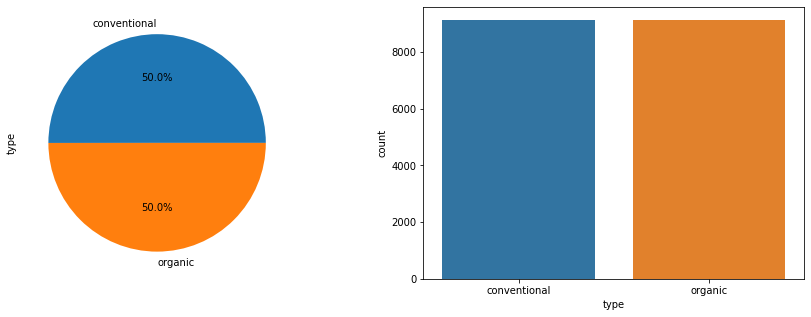

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

There two types organic and conventional are almost equal and balanced.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

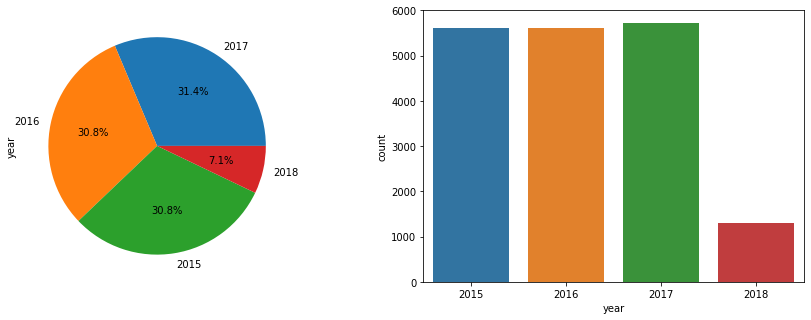

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

Total number of regions 54


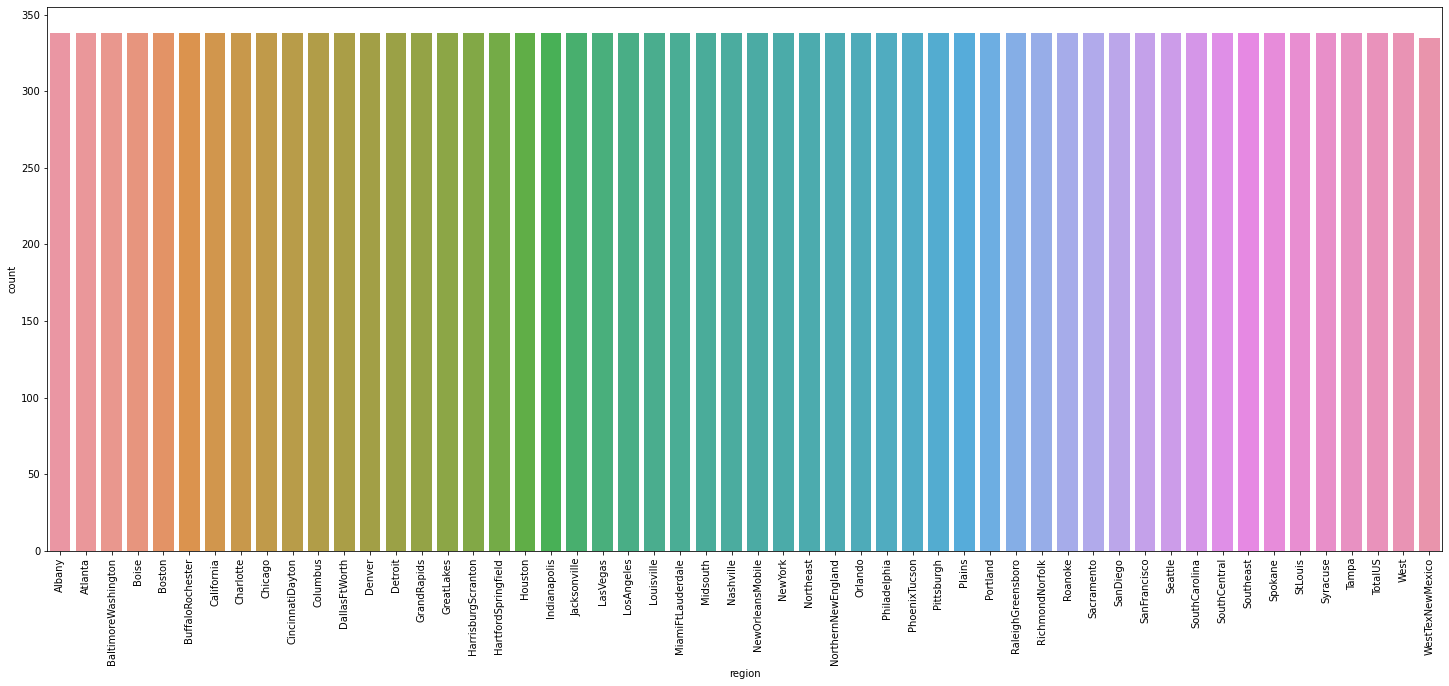

In [15]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.

Minimum 0.44
Maximum 3.25


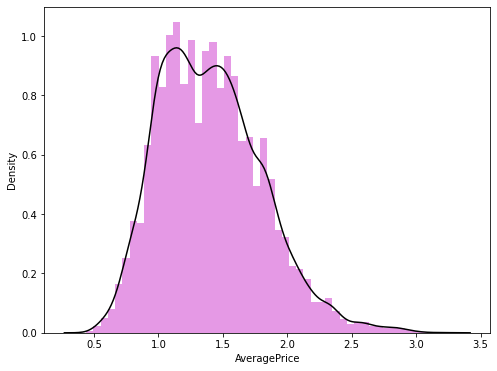

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(df['AveragePrice'],color='m', kde_kws={"color": "k"})
print('Minimum',df['AveragePrice'].min())
print('Maximum',df['AveragePrice'].max())

Average price of avacados little skewed, price ranging from 0.44 t0 3.25 

Minimum 84.56
Maximum 62505646.52


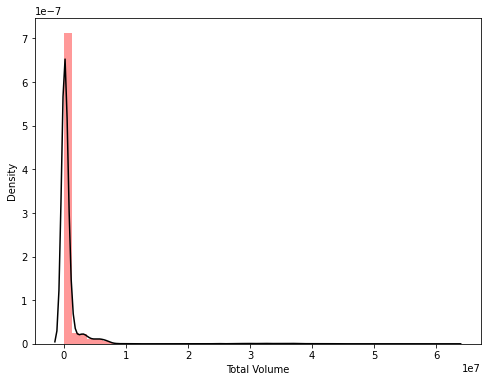

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Volume'],color='r', kde_kws={"color": "k"})
print('Minimum',df['Total Volume'].min())
print('Maximum',df['Total Volume'].max())

Most of the Total volume of Avacados is concentrated below 1e7 volumes while it goes upto 62505646.52 volumes. Data is higly skewed to the right, which needs to be taken care of ahead.

Minimum 0.0
Maximum 22743616.17


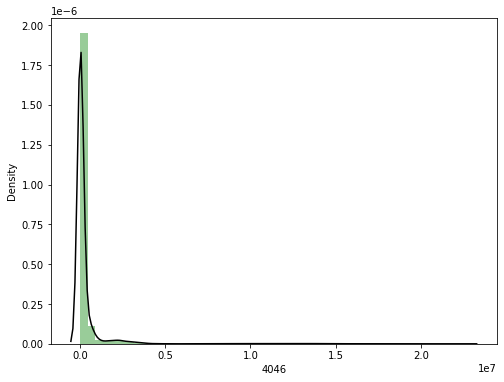

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(df['4046'],color='g', kde_kws={"color": "k"})
print('Minimum',df['4046'].min())
print('Maximum',df['4046'].max())

Avacados with Product look up code 4046 is mostly concentrated near the minimum whereas the range goes up to 22743616.17. Data is higly skewed to the right, which needs to be taken care of ahead.

Minimum 0.0
Maximum 2546439.11


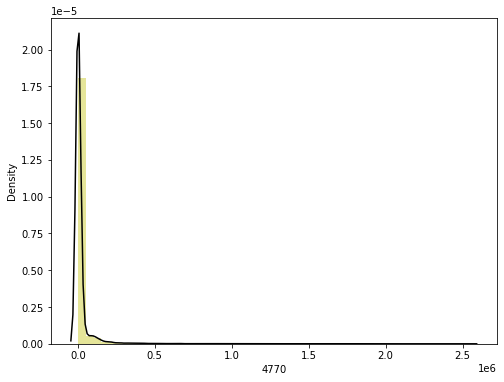

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(df['4770'],color='y', kde_kws={"color": "k"})
print('Minimum',df['4770'].min())
print('Maximum',df['4770'].max())

Avacados with Product look up code 4770 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 2546439.11 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.

Minimum 0.0
Maximum 20470572.61


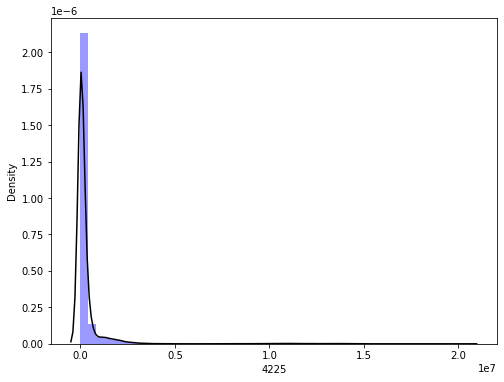

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(df['4225'],color='b', kde_kws={"color": "k"})
print('Minimum',df['4225'].min())
print('Maximum',df['4225'].max())

Avacados with Product look up code 4225 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 20470572.61 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.

Minimum 0.0
Maximum 19373134.37


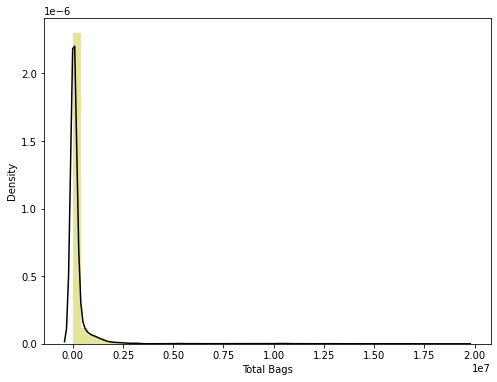

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Bags'],color='y', kde_kws={"color": "k"})
print('Minimum',df['Total Bags'].min())
print('Maximum',df['Total Bags'].max())

Total bags has most of its density near to its minimum value and goes up to a range of 19373134.37 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 13384586.8


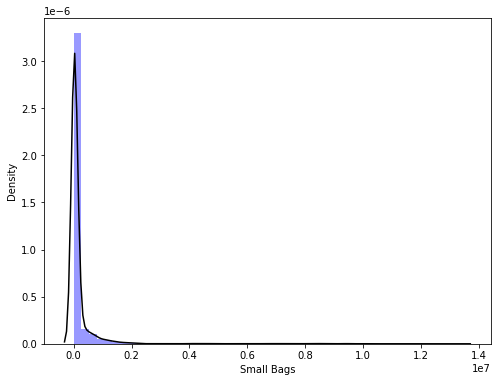

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(df['Small Bags'],color='b', kde_kws={"color": "k"})
print('Minimum',df['Small Bags'].min())
print('Maximum',df['Small Bags'].max())

Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 13384586.8 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 5719096.61


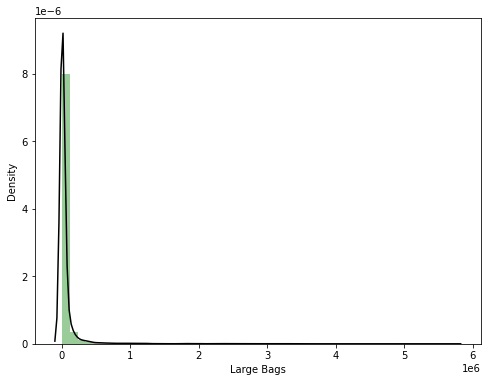

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(df['Large Bags'],color='g', kde_kws={"color": "k"})
print('Minimum',df['Large Bags'].min())
print('Maximum',df['Large Bags'].max())

Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 5719096.61 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 551693.65


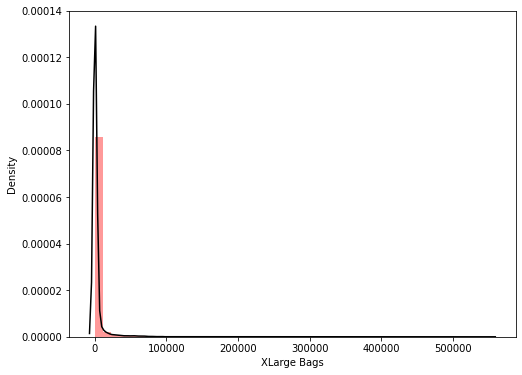

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(df['XLarge Bags'],color='r', kde_kws={"color": "k"})
print('Minimum',df['XLarge Bags'].min())
print('Maximum',df['XLarge Bags'].max())

Xtra large bags are densely populated in the range 0 to 5000, whereas they are spread till values more than 5 lakh. Distribution of data is highly right skewed.

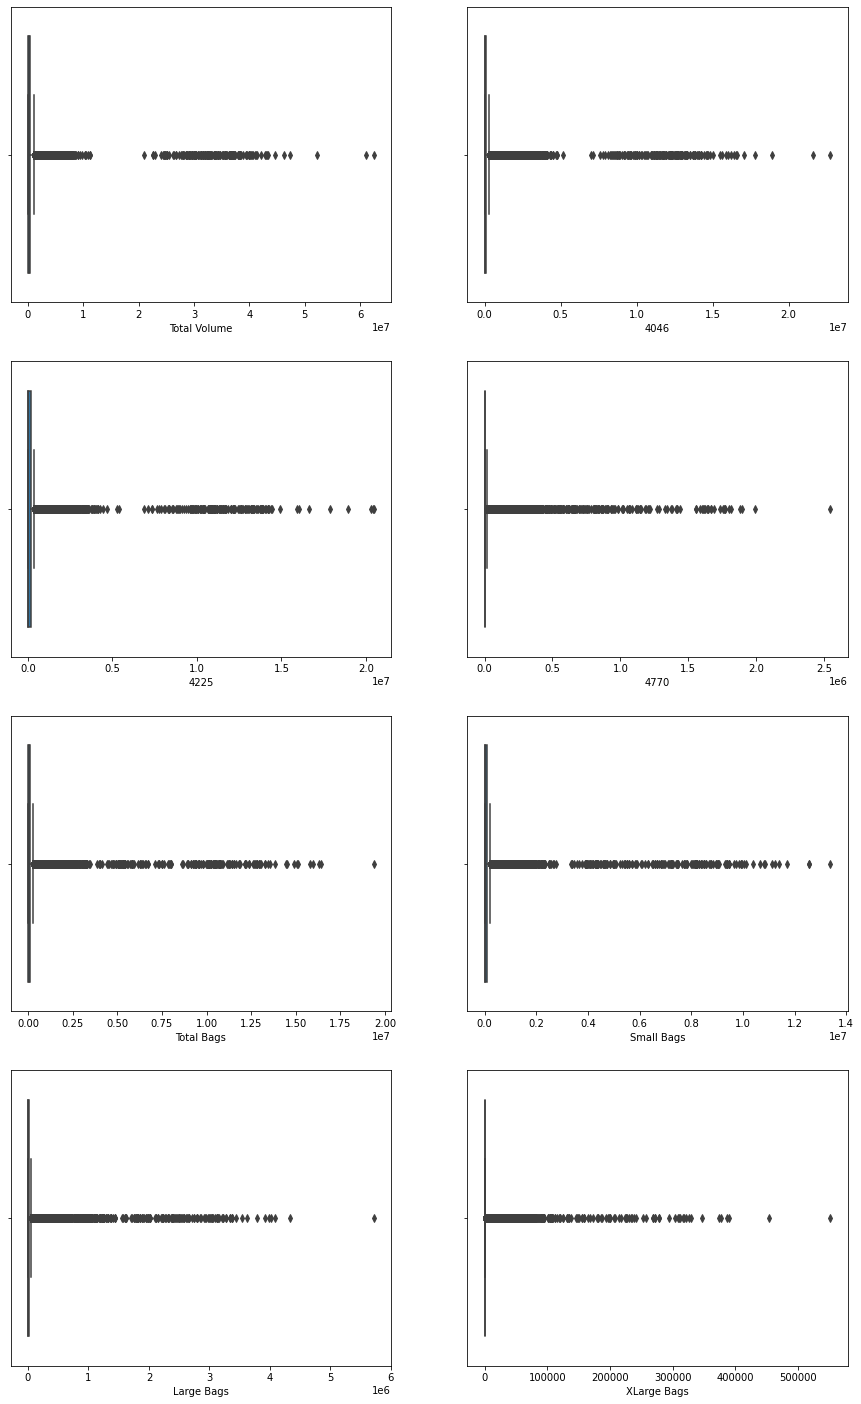

In [25]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],ax=ax[r,c])
    c+=1

There are a large number of outliers present in all the features that is needed to be removed.

### Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='region'>

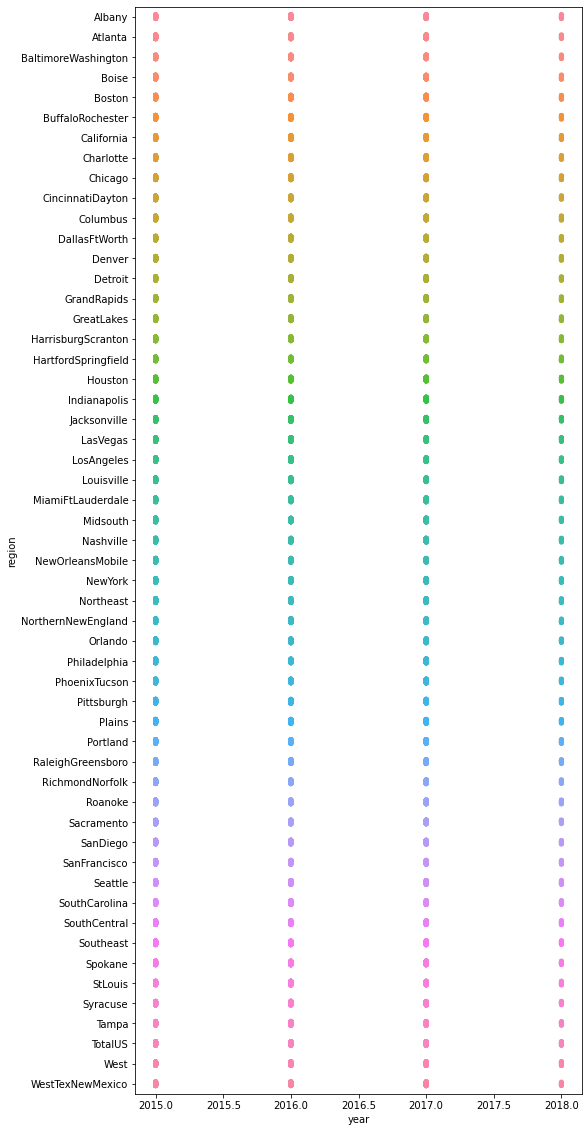

In [26]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

Avocados are collected from all the regions irrespective of the year. For each year avocados are collected from all the same regions.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

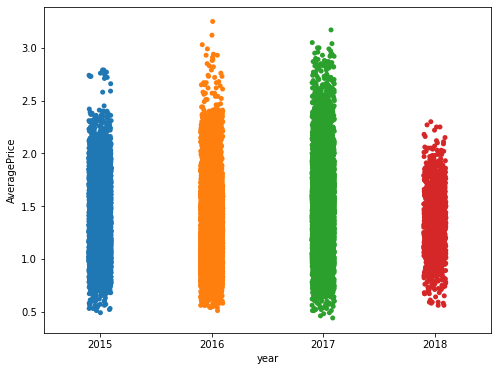

In [27]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception. 

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

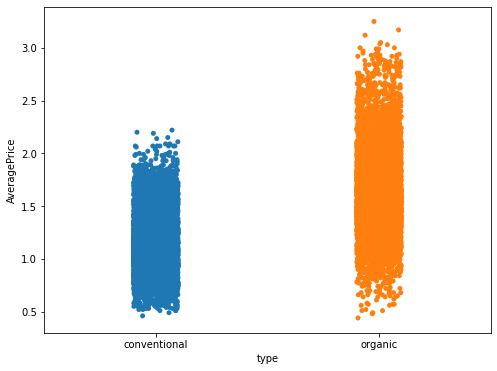

In [28]:
plt.figure(figsize=(8,6))
sns.stripplot(x='type',y='AveragePrice',data=df)

Organic Avacoados are more expensive than the conventional ones.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

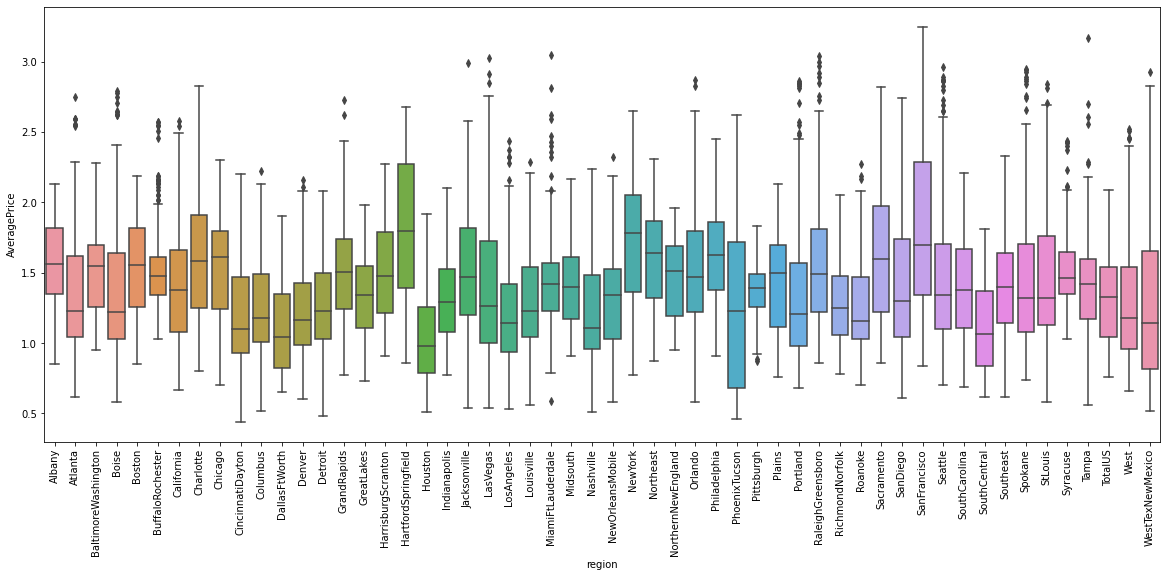

In [29]:
plt.figure(figsize=(20,8))
sns.boxplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

Highest average price for avacaodo's were in San diego, Las vegas and cahrlotte regions while the least was from phoenix tucson. It is also to be noted that highest average price belong from areas where there is more development.

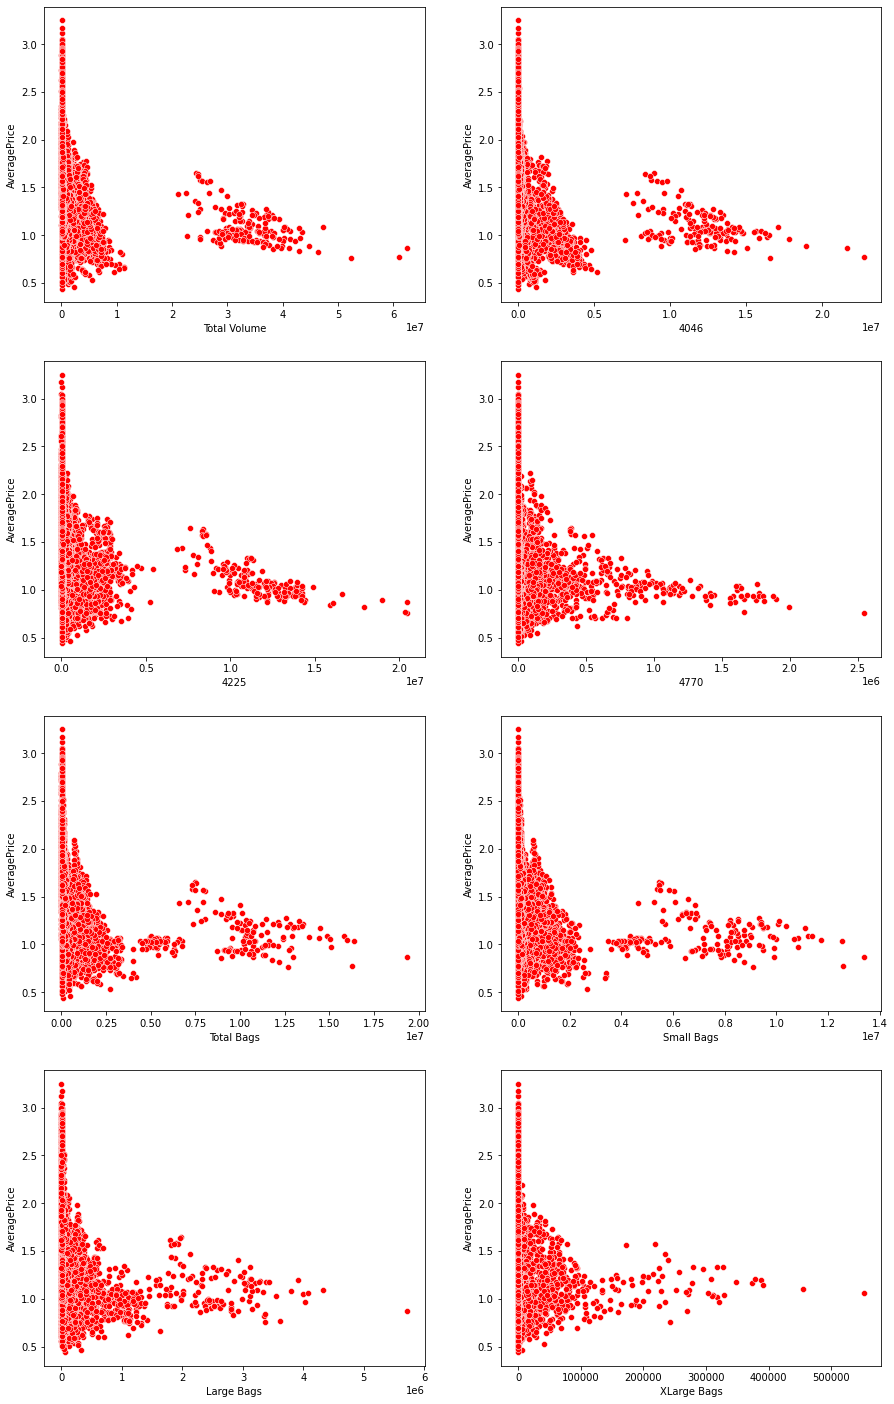

In [30]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='AveragePrice',data=df,ax=ax[r,c],color='r')
    c+=1

Average price shows a negative correlation as the average price seem to decrease as total volumes, PLU's and types of bags increases which means that average price decreases as the quantity of avacado's decreases.

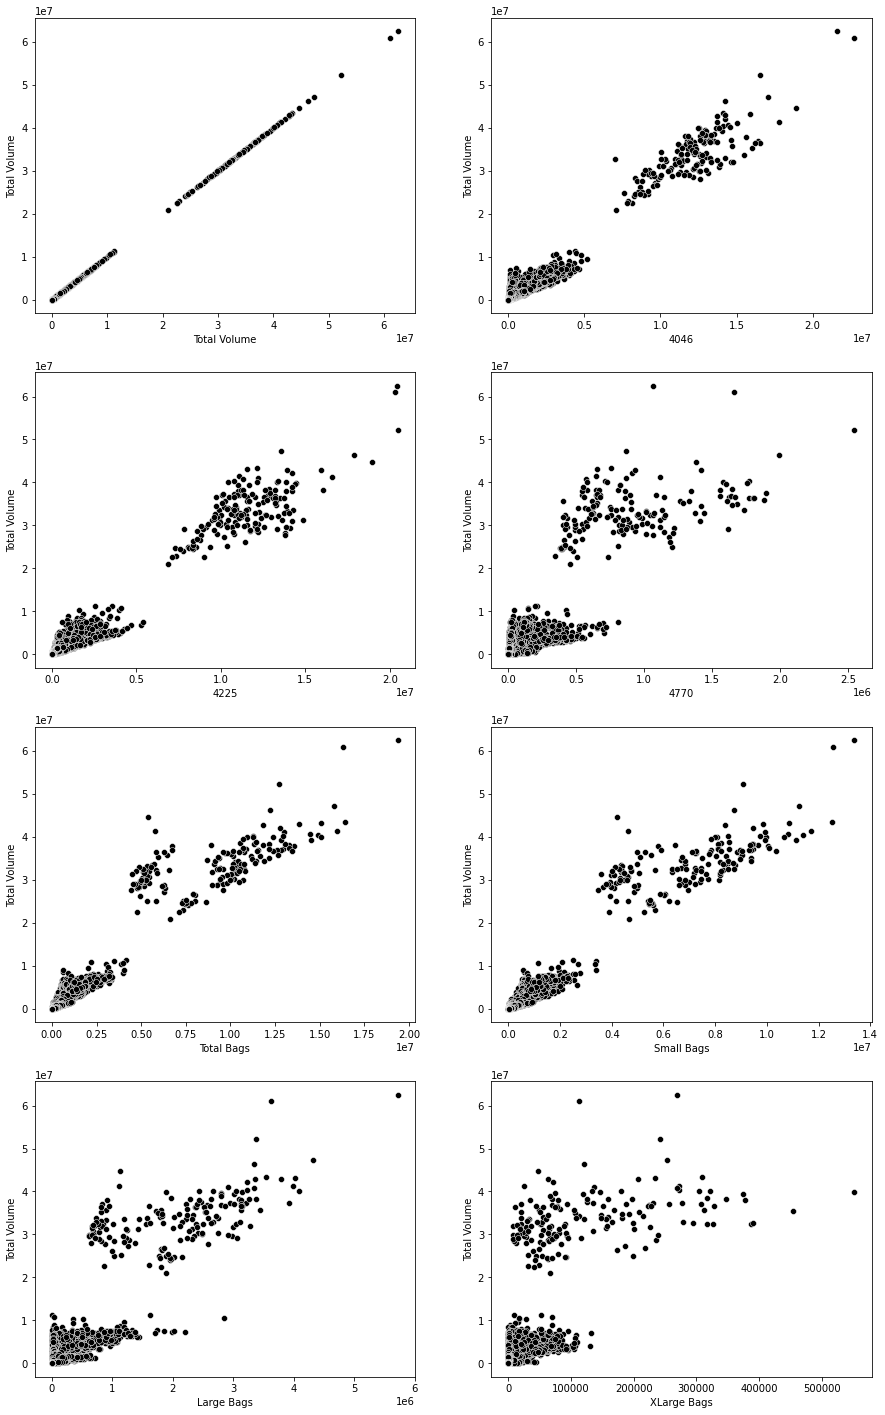

In [31]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='Total Volume',data=df,ax=ax[r,c],color='k')
    c+=1

With the increase in total volumes of avacado, quatity of all types of bags as well as PLU's also increases. This is logical as if volume of avacado's increases, no. of bags needed to carry it and PLU's inreases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

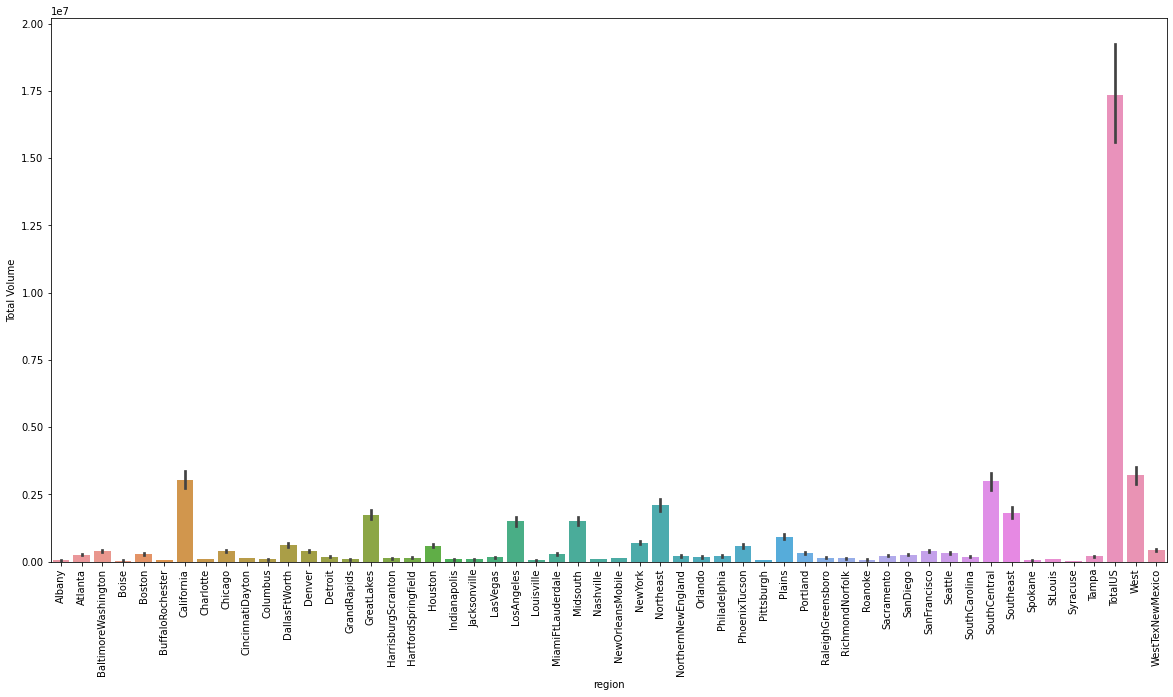

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)

Highest volumes of avacado's are found in the US. That could be the reason price of avacado's low there. As supply increases price decreases,whereas region with less volume such as las vegas have the highest price of avacado's.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

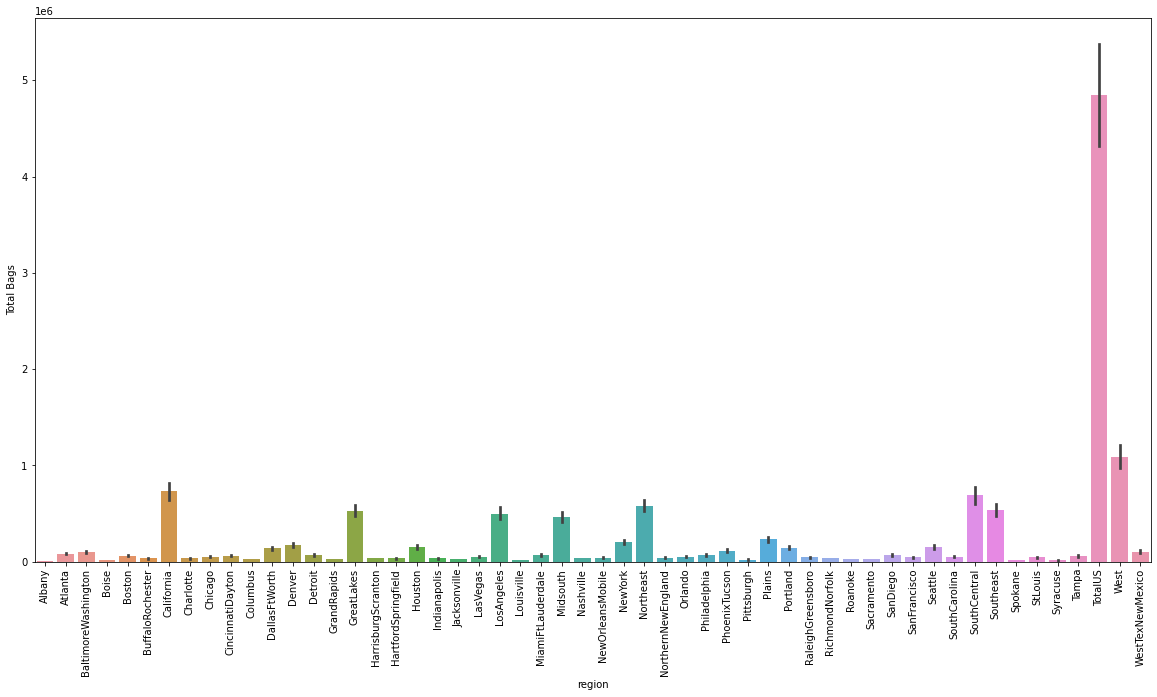

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='region',y='Total Bags',data=df)
plt.xticks(rotation=90)

Data is similar to the previous bar chart, as the volumes of avacado increases in a region, total bags also increases to carry those avacado's.

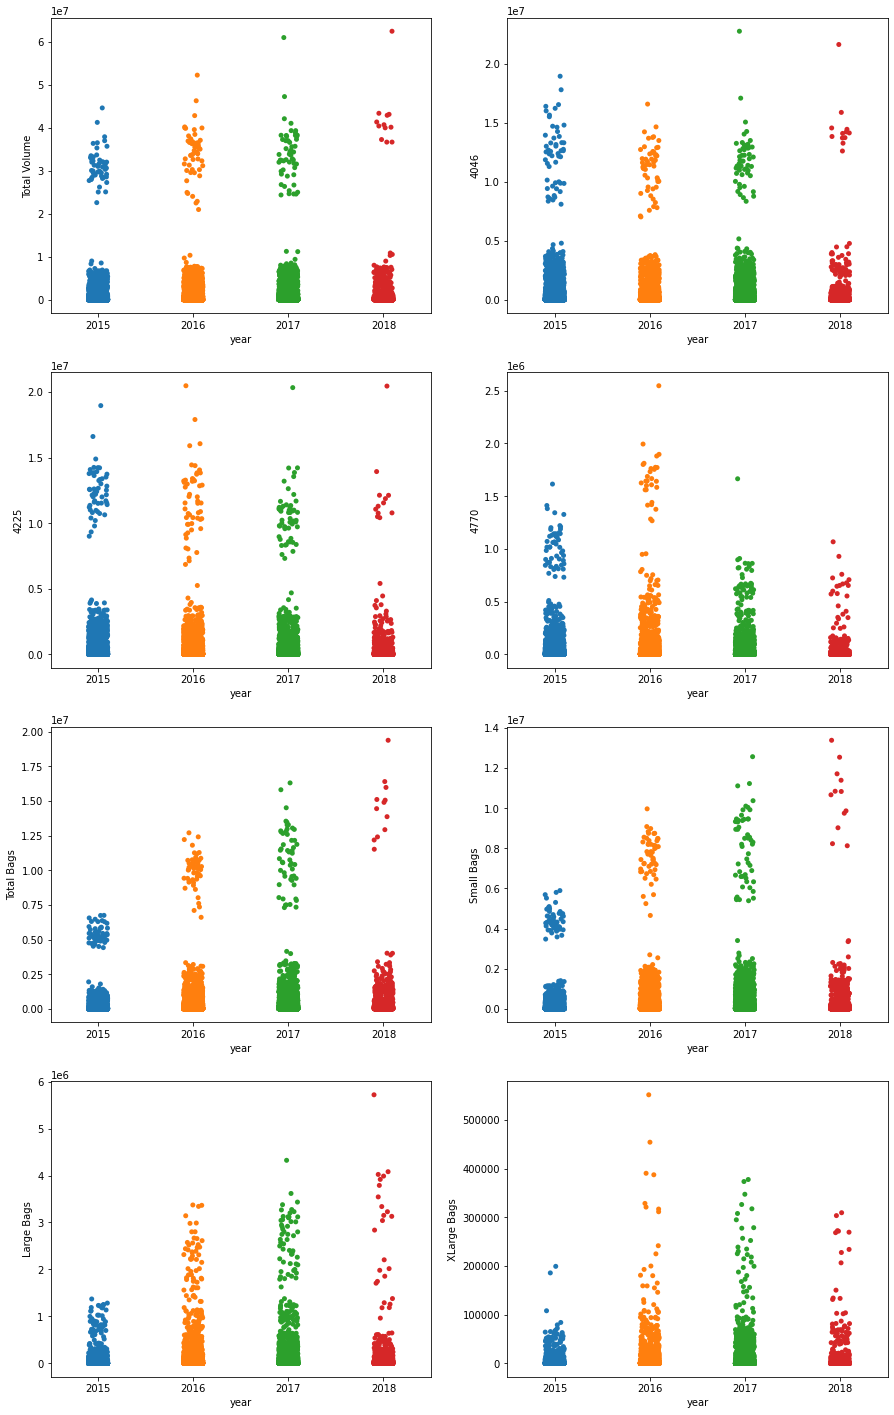

In [34]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.stripplot(x='year',y=n,data=df,ax=ax[r,c])
    c+=1

Though data for the year 2018 is very low but we can see that total volume, types of bags and PLUs are highest for 2018. As the time has passed volumes, bags to carry avocados  and plus have increased without any doubt.

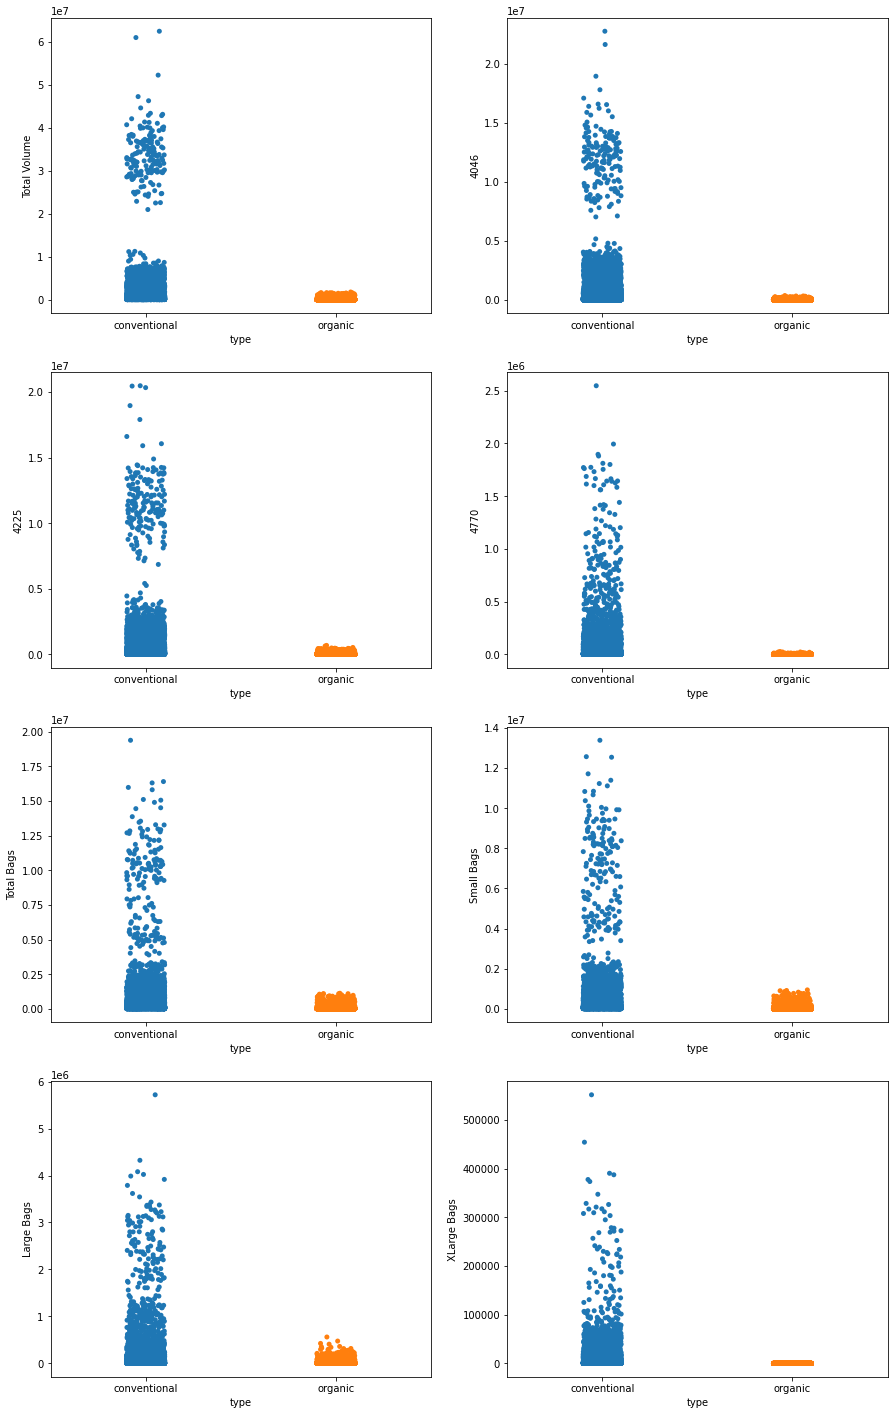

In [35]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.stripplot(x='type',y=n,data=df,ax=ax[r,c])
    c+=1

Toal volumes. types of bags, and PLU's are all high for convetional type of avocados, this states that although price of organic type is high but cobventional types of avocados are more produced.

### Multivariate Analysis

In [36]:
data=df.groupby(['AveragePrice','year']).apply(lambda x:x['Total Volume'].count()).reset_index(name='Volume')
px.line(data,x='AveragePrice',y='Volume',color='year',title='Average Price of Avacados by Volume for year 2015 and 2016  ')

Average price of avacado's for the year 2016 was way more than any other year, but highest volumes of avacado's were produced in 2015,reaching to a mark of 85, after that the produce of avocados seem to decrease. It is also to be noted that high volumes of avocados are sold at lower average price.

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

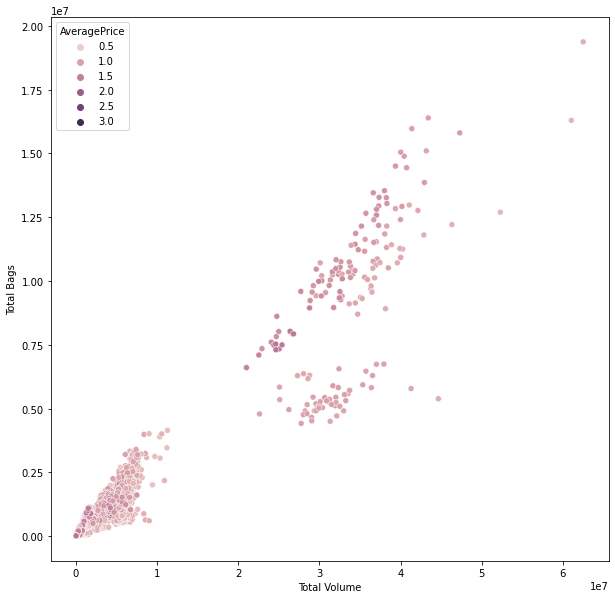

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Total Volume',y='Total Bags',hue='AveragePrice',data=df)

As the total volume increases, Total bags also increases to carry it but the average price seem to decrease. When the volumes of avacados are low average price increases of avacados.

<AxesSubplot:xlabel='Total Bags', ylabel='4225'>

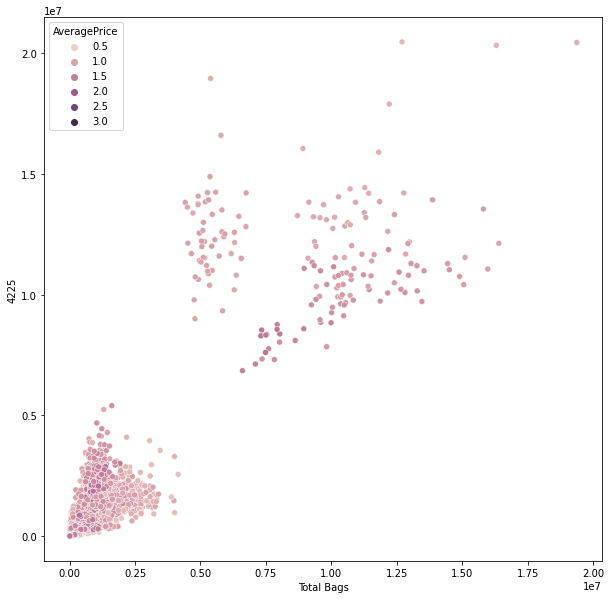

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Total Bags',y='4225',hue='AveragePrice',data=df)

As PlU's increases so does the no. of total bags but as we know if supply of something increases its price decreases. Same thing can be seen here.

<AxesSubplot:>

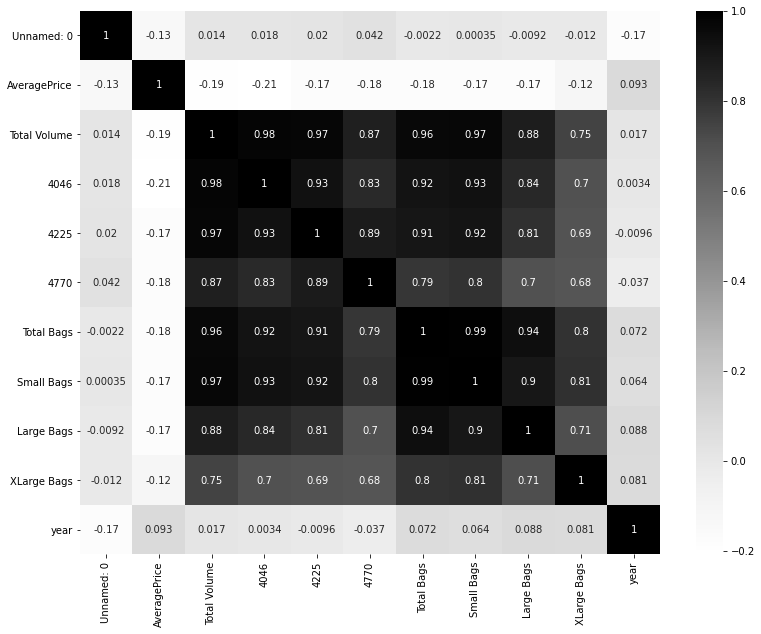

In [39]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

Average price shows positive relationship with the year column while negative correlation with all the other column. Intresting thing to notice here is that independent features show more than 90% correlation with each other. This is a case of multicollinearity. We need to remove some features to resolve this problem.

# Feature Engineering

###### Removing identifier and constant columns

In [40]:
#year column also need to be removed as we already have date column.
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

###### Handling date column

In [41]:
#Converting date column into datetime format
df['Date']=pd.to_datetime(df['Date'])

In [42]:
#Extracting month, day and year info from date column then dropping it.
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date',axis=1,inplace=True)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

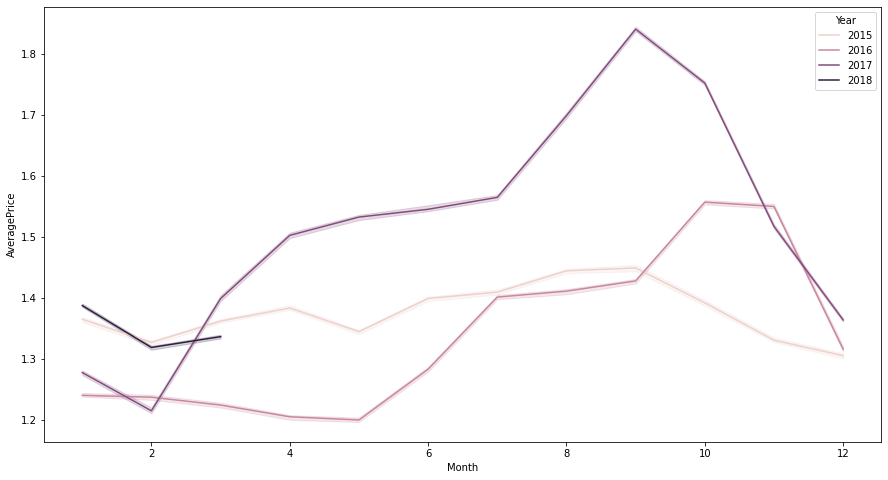

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='AveragePrice',hue='Year',ci=18,data=df)

Average price of avacado's is high in the month of September October November. As the season for avocado's is in the summer, off season fruit is expensive. We have data for year 2018 till march only

In [44]:
#We replace 2015 by 1 and 2016 by 2 for more simplicity
df['Year'].replace(2015,1,inplace=True)
df['Year'].replace(2016,2,inplace=True)
df['Year'].replace(2017,3,inplace=True)
df['Year'].replace(2018,24,inplace=True)

In [45]:
#we create a time column using year,month and day column and then drop these 3.
df['Time']=(df['Year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['Year','Month','Day'],axis=1,inplace=True)

###### Encoding

In [46]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [47]:
df['region']=o.fit_transform(df['region'].values.reshape(-1,1))
df['type']=o.fit_transform(df['type'].values.reshape(-1,1))

###### Removing Outliers

In [48]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2))) 

In [49]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 10.07%
With threshold 3.01 data loss is 10.06%
With threshold 3.02 data loss is 9.98%
With threshold 3.03 data loss is 9.97%
With threshold 3.04 data loss is 9.94%
With threshold 3.05 data loss is 9.93%
With threshold 3.06 data loss is 9.93%
With threshold 3.07 data loss is 9.89%
With threshold 3.08 data loss is 9.88%
With threshold 3.09 data loss is 9.84%
With threshold 3.1 data loss is 9.81%
With threshold 3.11 data loss is 9.81%
With threshold 3.12 data loss is 9.76%
With threshold 3.13 data loss is 9.75%
With threshold 3.14 data loss is 9.7%
With threshold 3.15 data loss is 9.7%
With threshold 3.16 data loss is 9.69%
With threshold 3.17 data loss is 9.67%
With threshold 3.18 data loss is 9.66%
With threshold 3.19 data loss is 9.64%
With threshold 3.2 data loss is 9.62%
With threshold 3.21 data loss is 9.61%
With threshold 3.22 data loss is 9.59%
With threshold 3.23 data loss is 9.57%
With threshold 3.24 data loss is 9.55%
With threshold 3.25 data los

In [50]:
#We use threshold as 3.57 because we cannot afford to loose much data
df=df[(z<3.57).all(axis=1)]

###### Removing Skewness

In [51]:
cont.append('Time')

In [52]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [53]:
#We make use of power transformer to remove skewness from all columns except from Total volume as it was incapable
for i in cont:
    if np.abs(df[i].skew())>0.5 and i!='Total Volume':
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

# To remove skewness from total volume column we ise log transformation
df['Total Volume']=np.log(df['Total Volume'])

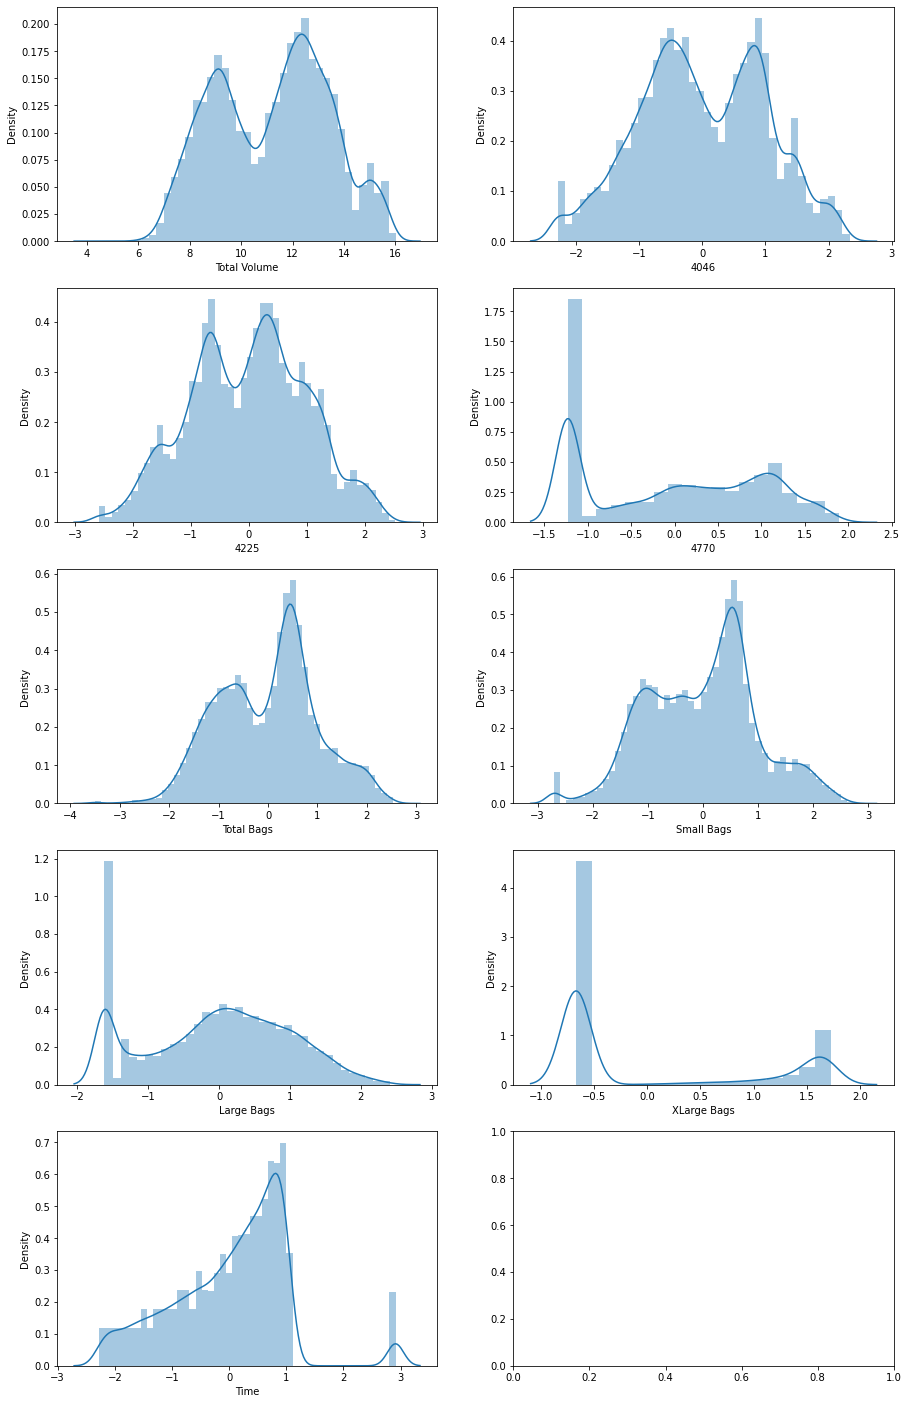

In [54]:
fig,ax=plt.subplots(5,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if r==4 and c==1:
        break
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

Skewness is almost negligible after using tranformations techniques. Only XLarge bags shows skewness in graph but it is still reduced considerably.

In [55]:
df.skew()

AveragePrice    0.488109
Total Volume   -0.029623
4046           -0.036961
4225           -0.043193
4770            0.025861
Total Bags     -0.020243
Small Bags     -0.024137
Large Bags     -0.106573
XLarge Bags     0.877451
type           -0.032906
region          0.010536
Time           -0.082757
dtype: float64

###### Separating the dependent and independent variables.

In [56]:
x=df.copy()
x.drop('AveragePrice',axis=1,inplace=True)

y=df['AveragePrice']

###### Scaling the data

In [57]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [58]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Modelling Phase

Importing neccessary modules

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score

In [60]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [63]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [64]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data
        

In [65]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.1083,0.0243,0.1559,0.82,0.2954
SVR,0.1575,0.0445,0.2109,0.58,-0.5372
LinearRegression,0.2077,0.0703,0.2651,0.19,0.1163
Lasso,0.3193,0.1537,0.3921,0.00,-1.2936
Ridge,0.2077,0.0703,0.2651,0.18,0.1169
ElasticNet,0.3193,0.1537,0.3921,0.00,-1.2936
DecisionTreeRegressor,0.1141,0.0312,0.1765,0.80,0.0516
RandomForestRegressor,0.0854,0.0146,0.1209,0.89,0.5408
AdaBoostRegressor,0.1993,0.0608,0.2466,0.27,0.1347


### Removing multicollinearity ussing L1 Regularisation

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,y)
print(m1.best_params_)

{'alpha': 1e-05}


In [68]:
m1=Lasso(alpha=1e-05)
m1.fit(x,y)

Lasso(alpha=1e-05)

In [69]:
importance = np.abs(m1.coef_)

In [70]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,Total Volume,1.508537
1,4046,0.051046
2,4225,1.342879
3,4770,0.059004
4,Total Bags,1.687128
5,Small Bags,1.208237
6,Large Bags,0.132470
7,XLarge Bags,0.028110
8,type,0.370657
9,region,0.053722


In [71]:
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
4,Total Bags,1.687128
0,Total Volume,1.508537
2,4225,1.342879
5,Small Bags,1.208237
10,Time,0.471573
8,type,0.370657
6,Large Bags,0.132470
3,4770,0.059004
9,region,0.053722
1,4046,0.051046


In [72]:
#We remove 1 feature
lassoxt=x.copy()
lassoxt.drop(['XLarge Bags'],axis=1,inplace=True)
createmodels(models,lassoxt,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.1035,0.0222,0.1491,0.84,0.3270
SVR,0.1537,0.0428,0.2068,0.60,-0.5526
LinearRegression,0.2074,0.0702,0.2649,0.19,0.1232
Lasso,0.3193,0.1537,0.3921,0.00,-1.2936
Ridge,0.2074,0.0702,0.2650,0.18,0.1238
ElasticNet,0.3193,0.1537,0.3921,0.00,-1.2936
DecisionTreeRegressor,0.1147,0.0318,0.1784,0.80,0.0637
RandomForestRegressor,0.0853,0.0147,0.1211,0.89,0.5334
AdaBoostRegressor,0.1964,0.0600,0.2449,0.32,0.1624


In [73]:
#We remove these 2 features
lassoxt=x.copy()
lassoxt.drop(['XLarge Bags','4046'],axis=1,inplace=True)
createmodels(models,lassoxt,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.1062,0.0233,0.1525,0.83,0.2282
SVR,0.1593,0.0456,0.2134,0.57,-0.5391
LinearRegression,0.2074,0.0702,0.2650,0.19,0.1241
Lasso,0.3193,0.1537,0.3921,0.00,-1.2936
Ridge,0.2074,0.0702,0.2650,0.18,0.1246
ElasticNet,0.3193,0.1537,0.3921,0.00,-1.2936
DecisionTreeRegressor,0.1202,0.0357,0.1888,0.77,0.0384
RandomForestRegressor,0.0870,0.0154,0.1242,0.88,0.4887
AdaBoostRegressor,0.2012,0.0624,0.2499,0.30,0.1116


As removing features also leads to some data loss, so the model's performance have decreased, therefore we will not remove any features.

###### We apply Hperparameter tuning on Knearest Neighbor, Random Forest and xtreme Gradient Boost as they are giving the best performance for our dataset

# Hyperparameter Tuning

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

###### Knearest Neighbor

In [75]:
leaf = list(range(1,50))
k = list(range(1,30))
params={'n_neighbors':k,'leaf_size':leaf,'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

In [76]:
g=GridSearchCV(KNeighborsRegressor(),params,cv=10)

In [78]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']})

In [79]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=3,
                    weights='distance')
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.8814969572076826


In [80]:
m=KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=3,weights='distance')
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [81]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.092
Mean Squared Error is 0.0186
Root Mean Squared Error is 0.1362
R2 Score is 86.89
Mean of cross validaton Score is 28.8535


###### Random Forest

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [84]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)

In [85]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500, 700]})

In [86]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=500)
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 8}
0.7928991713295739


In [87]:
m=RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=3,n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [88]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.129
Mean Squared Error is 0.0296
Root Mean Squared Error is 0.1721
R2 Score is 72.82
Mean of cross validaton Score is 43.0392


###### Xtreme Gradient Boost

In [89]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [90]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [91]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...one,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          re

In [92]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}
0.9000167486928442


In [93]:
m=XGBRegressor(colsample_bytree=0.5,gamma=0.1,learning_rate=0.1,max_depth=15,min_child_weight=7)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [94]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0894
Mean Squared Error is 0.0153
Root Mean Squared Error is 0.1236
R2 Score is 87.94
Mean of cross validaton Score is 60.0009


XGBRegressor is giving the best performance with minimum error compared to all the models, so we choose it as out final model.

### Finalizing the Model

In [95]:
model=XGBRegressor(colsample_bytree=0.5,gamma=0.1,learning_rate=0.1,max_depth=15,min_child_weight=7)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

# Evaluation Metrics

In [96]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0894
Mean Squared Error is 0.0153
Root Mean Squared Error is 0.1236
R2 Score is 87.94
Mean of cross validaton Score is 60.0009


Text(0.5, 1.0, 'XGBRegressor')

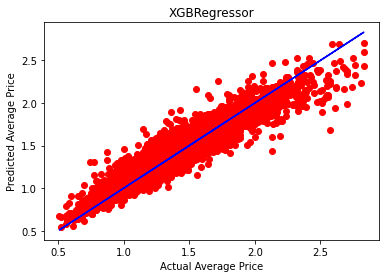

In [97]:
plt.scatter(x=ytest,y=p,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')

# Saving the Model

In [98]:
import joblib
joblib.dump(model,'avacadoprice.obj')

['avacadoprice.obj']